<a href="https://colab.research.google.com/github/leolani/cltl-face-all/blob/master/examples/colab/2.visual-features-check-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone the repo, download the necessary files, etc.

In [ ]:
%cd /content
!git clone https://github.com/leolani/cltl-face-all
!cd cltl-face-all/ && pip install .
!pip install omegaconf==2.0.5
!pip install tqdm av

# Download the annotations and stuff
!wget https://raw.githubusercontent.com/leolani/cltl-face-all/master/examples/smaller-datasets-jsons/datasets.json

!gdown --id 16ck7plW9v9eSHGCs5wuB2AhhufPRt3Wi
!unzip smaller-dataset.zip
!rm smaller-dataset.zip
!ls smaller-dataset/  |  wc -l

## Randomly select a video and play it

In [ ]:
from glob import glob
import random
import os
import json
import numpy as np
import av
import matplotlib.pyplot as plt
import cv2

VISUAL_FEATURES_PATH = 'drive/MyDrive/MELD/visual-features/smaller-dataset/'
VIDEOS_PATH = "smaller-dataset"
DATASET_PATH = 'datasets.json'


with open(DATASET_PATH, 'r') as stream:
    datasets = json.load(stream)

datasets = datasets['large']

diautt = random.choice(list(datasets['train'].keys()))

annot = datasets['train'][diautt]
features_path = os.path.join(VISUAL_FEATURES_PATH, diautt) + '.npy'


features = np.load(features_path, allow_pickle=True)
# below line is necessary since the saved file is actually a dictionary.
features = features.item()

vid_path = os.path.join(VIDEOS_PATH, diautt) +  '.mp4'
container = av.open(vid_path)

print(vid_path)

print(annot)

frames = {}
for idx, frame in enumerate(container.decode(video=0)):
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

assert np.abs(len(frames) - len(features)) <= 1



def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)


import random

from IPython.display import HTML
from base64 import b64encode
mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=1280 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


smaller-dataset/dia367_utt11.mp4
{'SrNo': '3698', 'Utterance': 'Really?', 'Speaker': 'Joey', 'Emotion': 'surprise', 'Sentiment': 'positive', 'Dialogue_ID': '367', 'Utterance_ID': '11', 'Season': '6', 'Episode': '6', 'StartTime': '0:14:09,390', 'EndTime': '0:14:11,742'}


## Randomly select a frame and check it

47


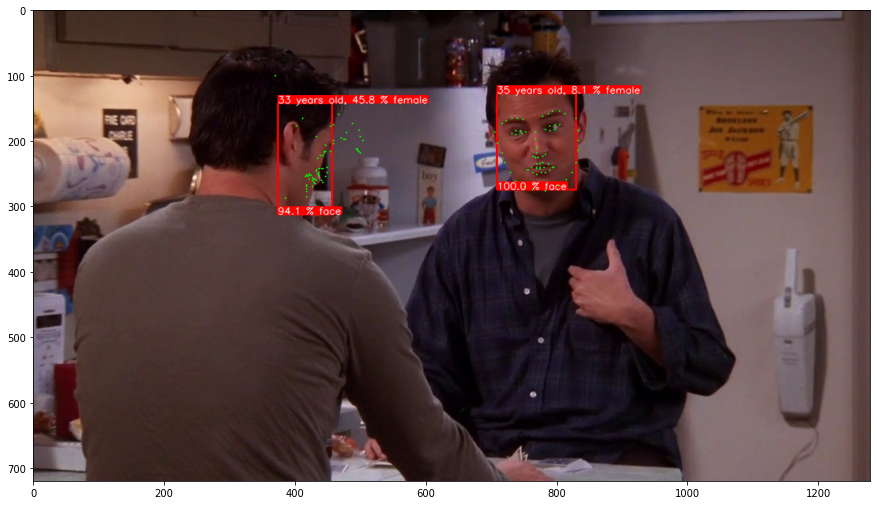

SrNo 	 3698
Utterance 	 Really?
Speaker 	 Joey
Emotion 	 surprise
Sentiment 	 positive
Dialogue_ID 	 367
Utterance_ID 	 11
Season 	 6
Episode 	 6
StartTime 	 0:14:09,390
EndTime 	 0:14:11,742


In [ ]:
idx = random.choice(list(frames.keys()))
img = frames[idx]
print(idx)

feature = features[idx]

for feat in feature:
    bbox = feat['bbox']
    landmark = feat['landmark']
    age = feat['age']
    gender = feat['gender']
    embedding = feat['embedding']
    # face = feat['face']

    x1, y1, x2, y2, prob = bbox
    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    label = f"{str(round(prob*100, 1))} % face"
    draw_label(img, (x1, y2), label, font_scale=0.5, thickness=1)

    for lm in landmark:
        cv2.circle(img, (int(lm[0]), int(lm[1])), 1, (0,255,0), -1)

    label = f"{int(age)} years old, {str(round(gender*100, 1))} % female"
    draw_label(img, (x1, y1), label, font_scale=0.5, thickness=1)
    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

for key, val in annot.items():
    print(key, '\t', val)

## Doing the same thing on the bigger datasets

In [5]:
from glob import glob
import random
import os
import json
import numpy as np
import av
import matplotlib.pyplot as plt
import cv2

VISUAL_FEATURES_PATH = 'drive/MyDrive/MELD/visual-features/entire-dataset/train'
VIDEOS_PATH = "drive/MyDrive/MELD/MELD.Raw/train/train_splits/"
DATASET_PATH = 'drive/MyDrive/MELD/visual-features/entire-dataset/datasets.json'


with open(DATASET_PATH, 'r') as stream:
    datasets = json.load(stream)


diautt = os.path.basename(random.choice(glob(os.path.join(VISUAL_FEATURES_PATH, '*.npy')))).split('.npy')[0]

annot = datasets['train'][diautt]
features_path = os.path.join(VISUAL_FEATURES_PATH, diautt) + '.npy'


features = np.load(features_path, allow_pickle=True)
# below line is necessary since the saved file is actually a dictionary.
features = features.item()

vid_path = os.path.join(VIDEOS_PATH, diautt) +  '.mp4'
container = av.open(vid_path)

print(vid_path)

print(annot)

frames = {}
for idx, frame in enumerate(container.decode(video=0)):
    numpy_RGB = np.array(frame.to_image())
    frames[idx] = numpy_RGB

assert np.abs(len(frames) - len(features)) <= 1



def draw_label(image, point, label, font=cv2.FONT_HERSHEY_SIMPLEX,
               font_scale=0.8, thickness=1):
    size = cv2.getTextSize(label, font, font_scale, thickness)[0]
    x, y = point
    cv2.rectangle(image, (x, y - size[1]), (x + size[0], y), (255, 0, 0), cv2.FILLED)
    cv2.putText(image, label, point, font, font_scale, (255, 255, 255), thickness, lineType=cv2.LINE_AA)


import random

from IPython.display import HTML
from base64 import b64encode
mp4 = open(vid_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=1280 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


drive/MyDrive/MELD/MELD.Raw/train/train_splits/dia99_utt12.mp4
{'SrNo': '989', 'Utterance': 'I thought I heard voices. You must be Chandler.', 'Speaker': 'Cassie', 'Emotion': 'neutral', 'Sentiment': 'neutral', 'Dialogue_ID': '99', 'Utterance_ID': '12', 'Season': '7', 'Episode': '19', 'StartTime': '00:06:02,111', 'EndTime': '00:06:05,447'}


22


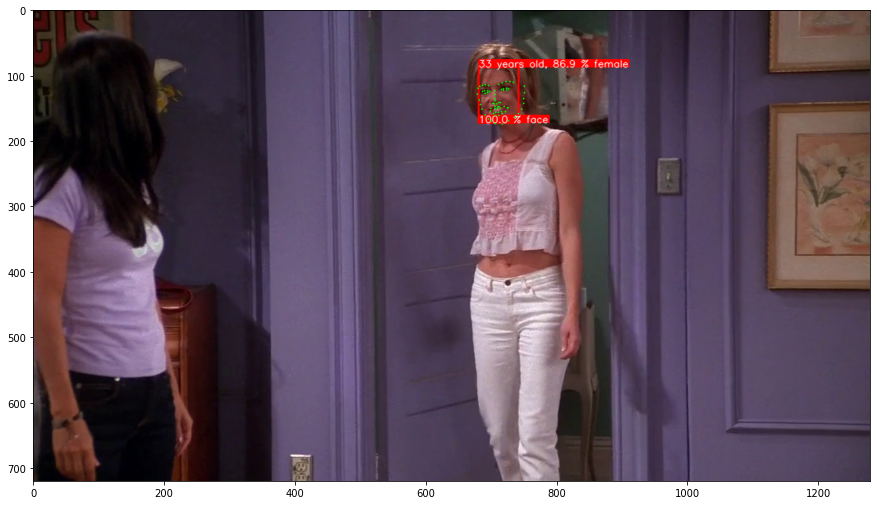

SrNo 	 989
Utterance 	 I thought I heard voices. You must be Chandler.
Speaker 	 Cassie
Emotion 	 neutral
Sentiment 	 neutral
Dialogue_ID 	 99
Utterance_ID 	 12
Season 	 7
Episode 	 19
StartTime 	 00:06:02,111
EndTime 	 00:06:05,447


In [7]:
idx = random.choice(list(frames.keys()))
img = frames[idx]
print(idx)

feature = features[idx]

for feat in feature:
    bbox = feat['bbox']
    landmark = feat['landmark']
    age = feat['age']
    gender = feat['gender']
    embedding = feat['embedding']
    # face = feat['face']

    x1, y1, x2, y2, prob = bbox
    
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    label = f"{str(round(prob*100, 1))} % face"
    draw_label(img, (x1, y2), label, font_scale=0.5, thickness=1)

    for lm in landmark:
        cv2.circle(img, (int(lm[0]), int(lm[1])), 1, (0,255,0), -1)

    label = f"{int(age)} years old, {str(round(gender*100, 1))} % female"
    draw_label(img, (x1, y1), label, font_scale=0.5, thickness=1)
    
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

for key, val in annot.items():
    print(key, '\t', val)